<a href="https://colab.research.google.com/github/manor-s/DS-course-project-4/blob/main/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
csv_file_path = '/content/drive/My Drive/e-commerce project/Churn_Modelling.csv'
churn = pd.read_csv(csv_file_path)



In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.shape

(10000, 14)

# Label Description

**RowNumber** - Serial Row Number (from 1 to 10000)

**CustomerId** - Unique Ids for bank customer identification

**Surname** - Customer's last name (2932 unique values)

**CreditScore** - Credit score of the customer

**Geography** - The country from which the customer belongs

**Gender** - Male or Female

**Age** - Age of the customer

**Tenure** - Number of years for which the customer has been with the bank

**Balance** - Bank balance of the customer

**NumOfProducts** - Number of bank products the customer is utilising

**HasCrCard** - Binary Flag for whether the customer holds a credit card with the bank or not

**IsActiveMember** - Binary Flag for whether the customer is an active member with the bank or not

**EstimatedSalary** - Estimated salary of the customer in Dollars

**Exited** - Binary flag 1 if the customer closed account with bank and 0 if the customer is retained



# Data Types

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


## Free memory by reduction of int's and float's types

In [7]:
# Convert int64 to int32
churn = churn.astype({col: 'int32' for col in churn.select_dtypes(include=['int64']).columns})
# Convert float64 to float32
churn = churn.astype({col: 'float32' for col in churn.select_dtypes(include=['float64']).columns})

In [8]:
print(churn.memory_usage(deep=True).sum())

2323595


## Dealing with duplicates (if any)

In [35]:
rows_before = churn.shape[0]
print(f"Number of rows before removing duplicates: {rows_before}")

# Remove duplicates
churn = churn.drop_duplicates()

rows_after = churn.shape[0]
print(f"Number of rows after removing duplicates: {rows_after}")

print(f"Number of duplicate rows removed: {rows_before - rows_after}")


Number of rows before removing duplicates: 10000
Number of rows after removing duplicates: 10000
Number of duplicate rows removed: 0


# Plot Histograms

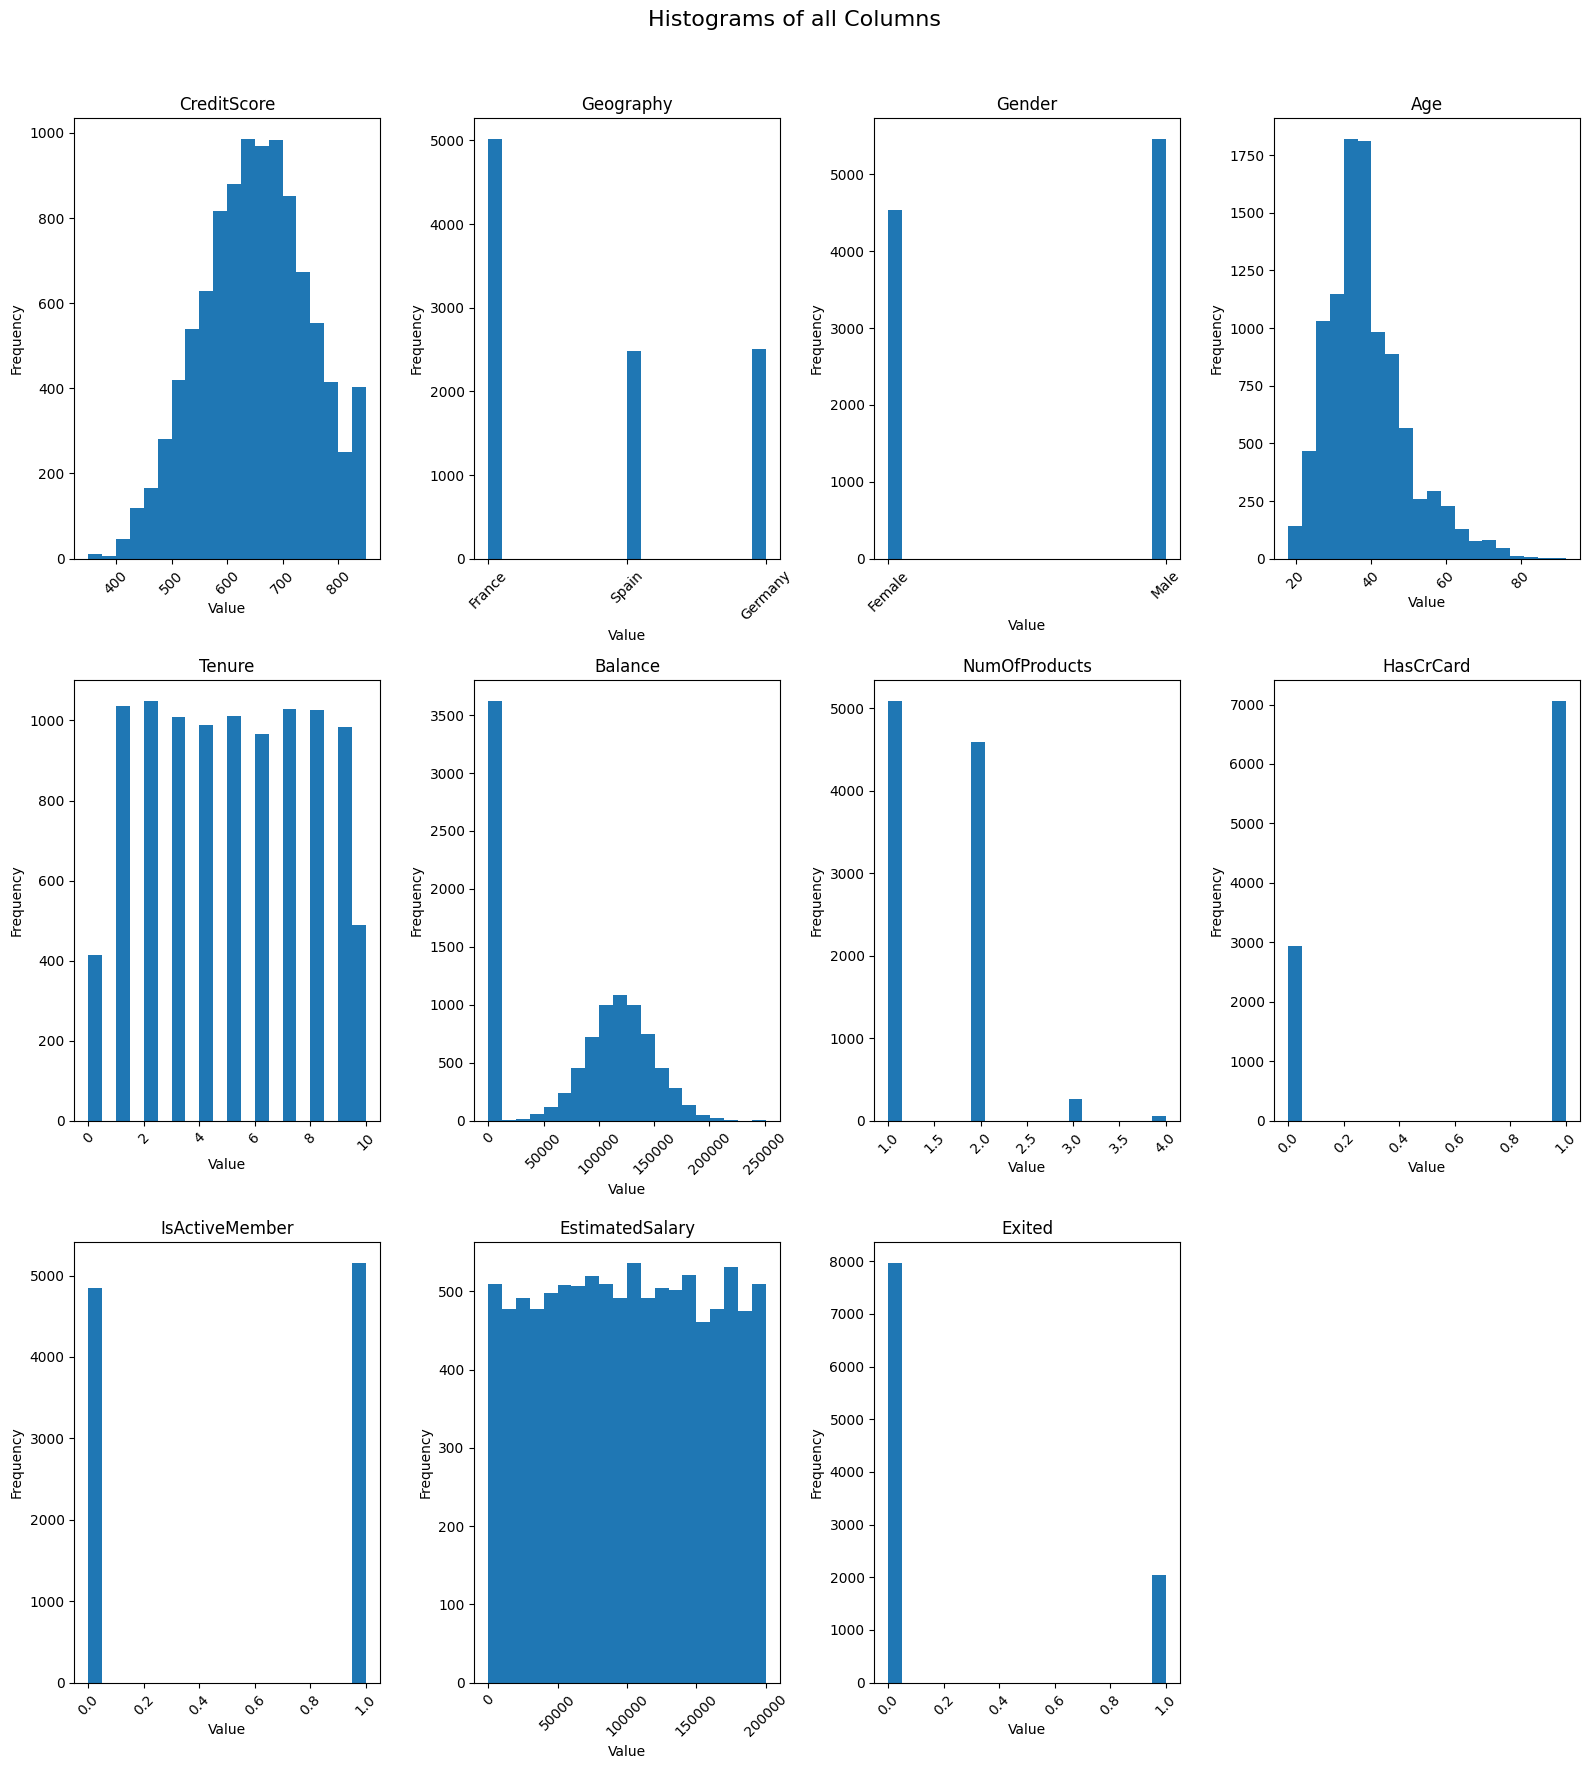

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Set number of columns and dynamic rows for subplots based on 256 variables
n_cols = 4  # Customize as needed (number of columns of subplots)
n_rows = int(np.ceil((len(churn.columns) - 3) / n_cols))  # Dynamically calculate rows

# Adjust figure size to accommodate all subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 6))
ax = ax.flatten()  # Flatten the axis array to easily iterate over

# Loop through columns and create histograms
for i, col in enumerate(churn.columns[3:]):
    churn[col].hist(ax=ax[i], bins=20, grid=False)  # Plot each histogram
    ax[i].set_title(col)  # Set title as the column name
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel('Value')

    # Rotate x-axis labels for better readability
    for label in ax[i].get_xticklabels():
        label.set_rotation(45)

# Remove empty subplots if there are any
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Add a super title for the entire figure
plt.suptitle('Histograms of all Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout so the title fits
plt.show()


## Estimating outliers by box plotting

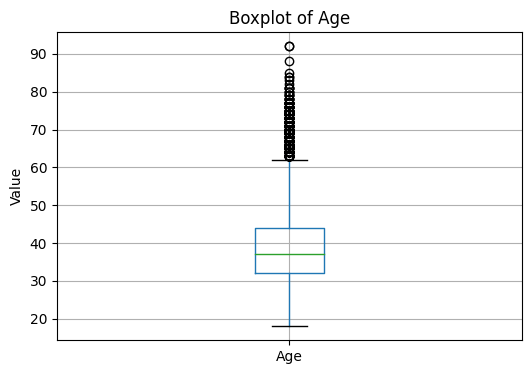

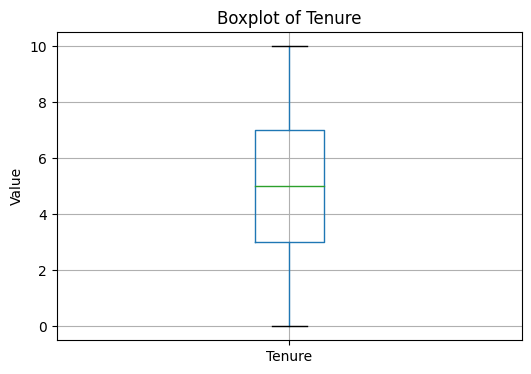

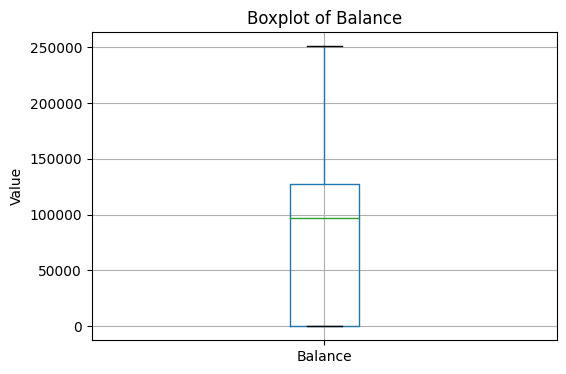

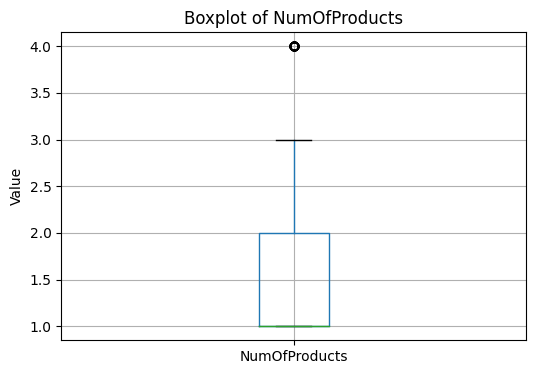

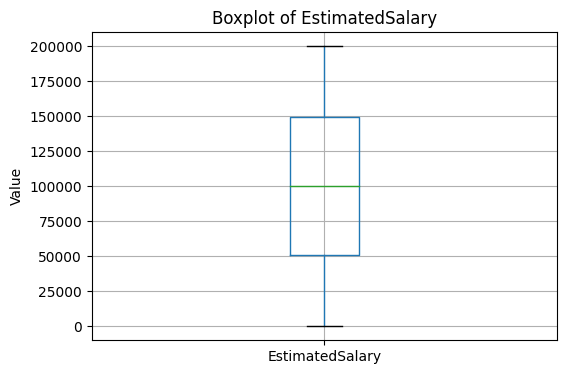

In [42]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = churn.select_dtypes(include=['number']).columns

# Loop through columns from the fourth one onward
for col in numeric_columns[3:]:  # Starting from the fourth column (index 3)
  # Check if the column does not contain only 0 and 1 values
  if not set(churn[col].unique()).issubset({0, 1}):
    # Create a boxplot
    plt.figure(figsize=(6, 4))
    churn.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Value')
    plt.show()


## Pairplotting

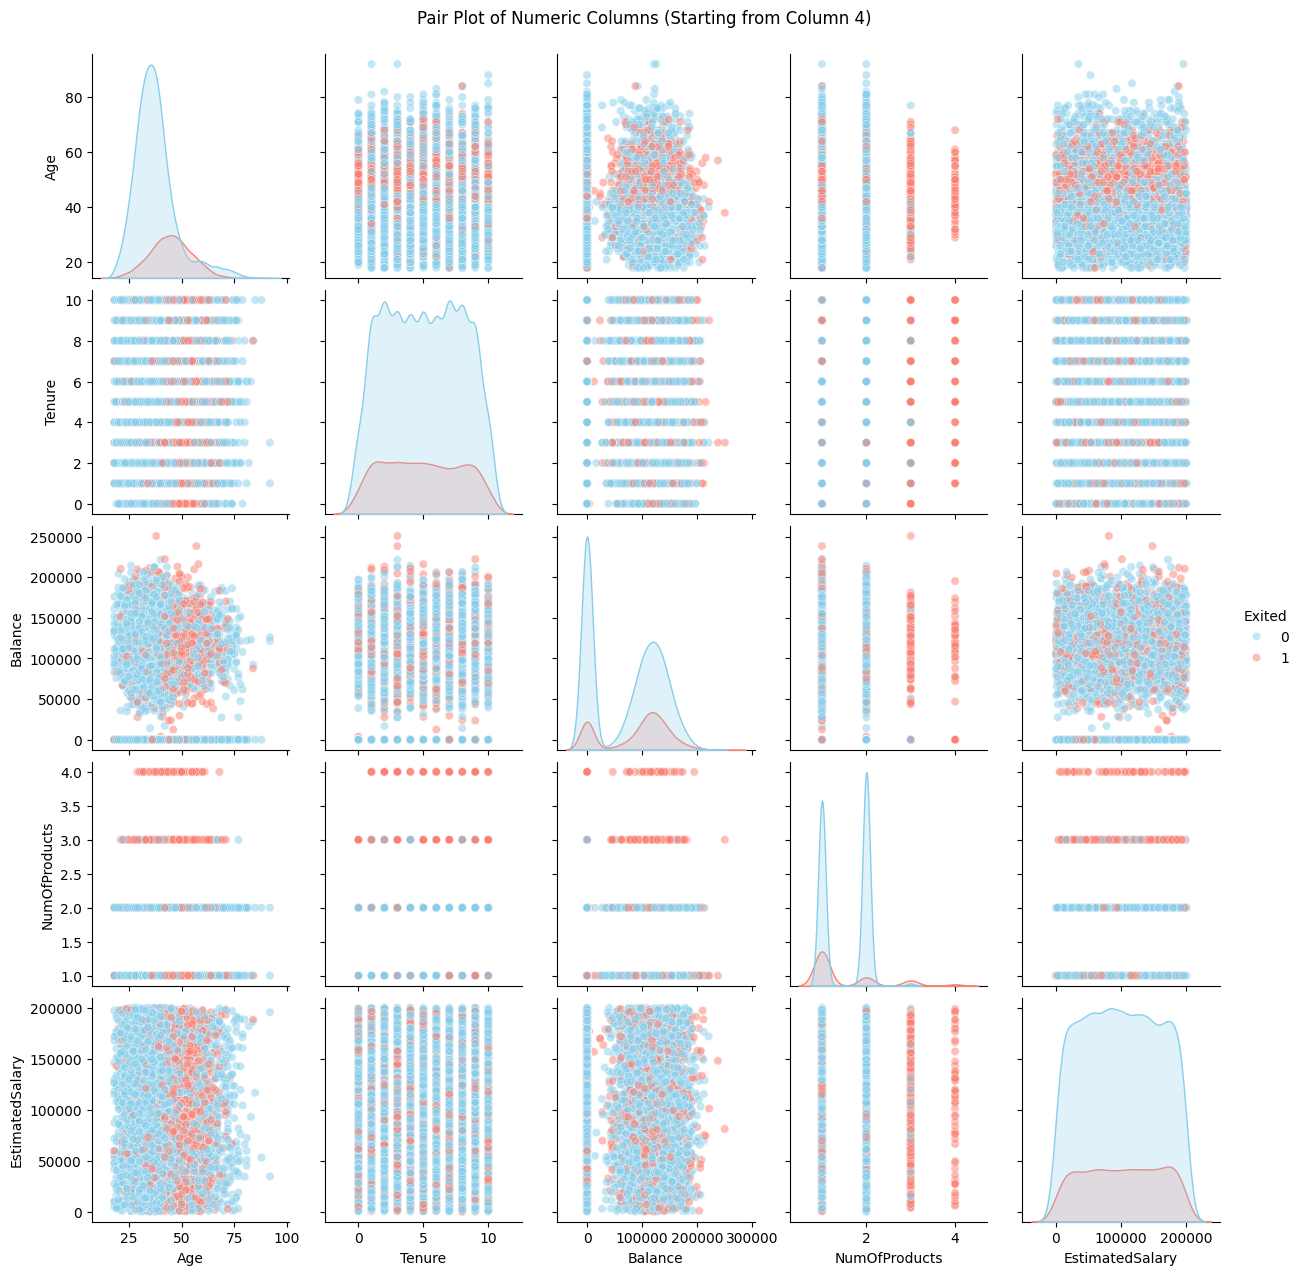

In [46]:
import seaborn as sns
import pandas as pd

# Select only numeric columns from the fourth column onward
numeric_columns = churn.select_dtypes(include=['number']).columns[3:]

# Filter out columns with only values 0 and 1
relevant_columns = [col for col in numeric_columns if not set(churn[col].unique()).issubset({0, 1})]

# Add "Exited" column to the list for coloring and create a DataFrame with relevant columns
relevant_columns.append("Exited")
churn_relevant = churn[relevant_columns]

# Create a pair plot with different colors for "Exited" values
sns.pairplot(churn_relevant, hue="Exited", palette={0: "skyblue", 1: "salmon"}, plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Numeric Columns (Starting from Column 4)', y=1.02)
plt.show()


## Estimating the behavior of churn in each column

<ipython-input-33-18fd16795351>:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if total_counts[j] > 0:
<ipython-input-33-18fd16795351>:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[i].text(x[j], max(counts_0[j], counts_1[j]) * 1.05, f"{proportions[j]:.2f}",
<ipython-input-33-18fd16795351>:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if total_counts[j] > 0:
<ipython-input-33-18fd16795351>:62: FutureWarning: Series.__ge

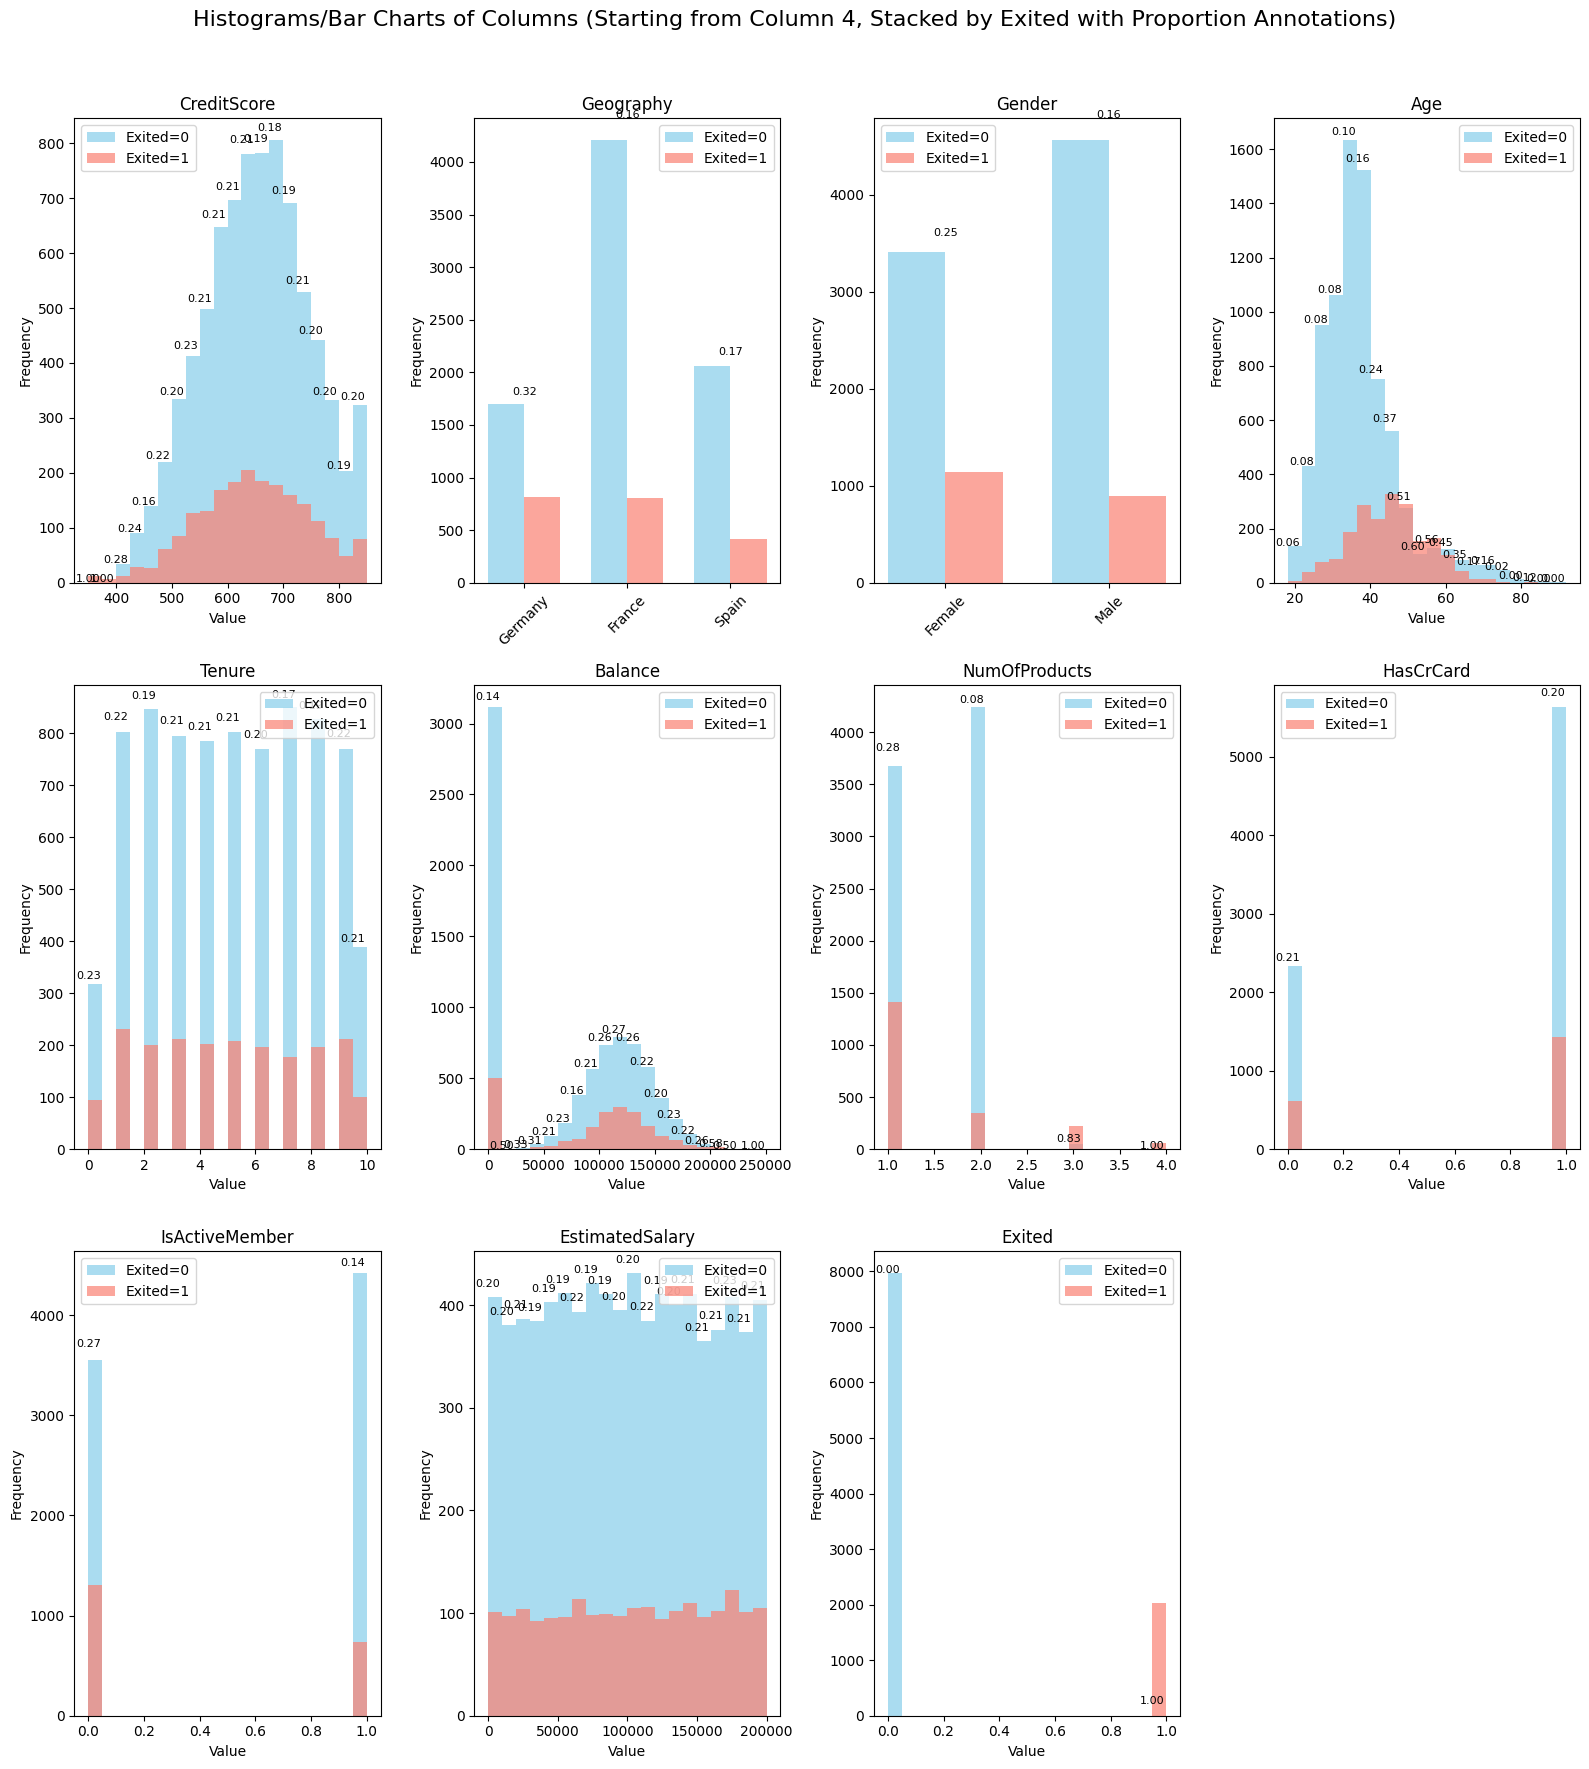

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Set number of columns and dynamic rows for subplots based on columns starting from the 4th column
n_cols = 4  # Customize as needed (number of columns of subplots)
n_rows = int(np.ceil((len(churn.columns) - 3) / n_cols))  # Adjust row calculation to include "exited" and start from 4th column

# Adjust figure size to accommodate all subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 6))
ax = ax.flatten()  # Flatten the axis array to easily iterate over

# Loop through columns starting from the 4th column
for i, col in enumerate(churn.columns[3:]):  # Start from the 4th column, including "exited"
  if np.issubdtype(churn[col].dtype, np.number):  # Numeric columns
    bins = 20
    bin_edges = np.histogram_bin_edges(churn[col], bins=bins)

    # Histograms for exited = 0 and exited = 1
    counts_0, _ = np.histogram(churn[churn["Exited"] == 0][col], bins=bin_edges)
    counts_1, _ = np.histogram(churn[churn["Exited"] == 1][col], bins=bin_edges)

    # Plot histograms
    ax[i].hist(bin_edges[:-1], bin_edges, weights=counts_0, color='skyblue', alpha=0.7, label='Exited=0')
    ax[i].hist(bin_edges[:-1], bin_edges, weights=counts_1, color='salmon', alpha=0.7, label='Exited=1')

    # Calculate and annotate proportions
    total_counts = counts_0 + counts_1
    proportions = np.divide(counts_1, total_counts, out=np.zeros_like(counts_1, dtype=float), where=total_counts != 0)

    for j in range(len(bin_edges) - 1):
      if total_counts[j] > 0:
        ax[i].text(bin_edges[j], counts_0[j] + counts_1[j] * 0.1, f"{proportions[j]:.2f}",
                   ha='center', color='black', fontsize=8)

    ax[i].set_title(col)
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel('Value')
    ax[i].legend()

  else:  # Non-numeric columns
    # Get value counts for each 'exited' group
    counts_0 = churn[churn["Exited"] == 0][col].value_counts()
    counts_1 = churn[churn["Exited"] == 1][col].value_counts()

    # Ensure all categories are included
    categories = list(set(counts_0.index).union(set(counts_1.index)))
    counts_0 = counts_0.reindex(categories, fill_value=0)
    counts_1 = counts_1.reindex(categories, fill_value=0)

    # Plot bars
    x = np.arange(len(categories))
    width = 0.35
    ax[i].bar(x - width / 2, counts_0, width, label='Exited=0', color='skyblue', alpha=0.7)
    ax[i].bar(x + width / 2, counts_1, width, label='Exited=1', color='salmon', alpha=0.7)

    # Calculate and annotate proportions
    total_counts = counts_0 + counts_1
    proportions = np.divide(counts_1, total_counts, out=np.zeros_like(counts_1, dtype=float), where=total_counts != 0)

    for j, category in enumerate(categories):
      if total_counts[j] > 0:
        ax[i].text(x[j], max(counts_0[j], counts_1[j]) * 1.05, f"{proportions[j]:.2f}",
                   ha='center', color='black', fontsize=8)

    ax[i].set_title(col)
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(categories, rotation=45)
    ax[i].set_ylabel('Frequency')
    ax[i].legend()

# Remove empty subplots if there are any
for j in range(i + 1, len(ax)):
  fig.delaxes(ax[j])

# Add a super title for the entire figure
plt.suptitle('Histograms/Bar Charts of Columns (Starting from Column 4, Stacked by Exited with Proportion Annotations)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout so the title fits
plt.show()


# Summary

The dataset appears well-structured and complete, suggesting it has likely undergone some processing. No unexplainable outliers are present. There is no evident interrelationship among the numerical variables.

Observations related to churn behavior include:

* Product Count: Customers with three or more products exhibit a significantly higher churn rate. Excluding this group could be considered during the modeling process.
* Geography: German customers show a distinct churn pattern compared to those from France and Spain.
* Gender: Female customers have a higher churn rate than male customers.
* Active Membership: Active members tend to have a lower churn rate.
* Balance: Accounts with a balance of zero behave differently than those with a positive balance, potentially warranting a separate categorical consideration.
* Credit Score: Lower credit scores may correlate with increased churn risk.
* Age: Churn rates appear notably higher among customers aged 40 to 60.

